In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("C:/Users/Ataberk/Downloads/column_2C_weka.csv")

In [3]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [6]:
x=np.array(data.loc[:,"pelvic_incidence"]).reshape(-1,1)
y=np.array(data.loc[:,"sacral_slope"]).reshape(-1,1)

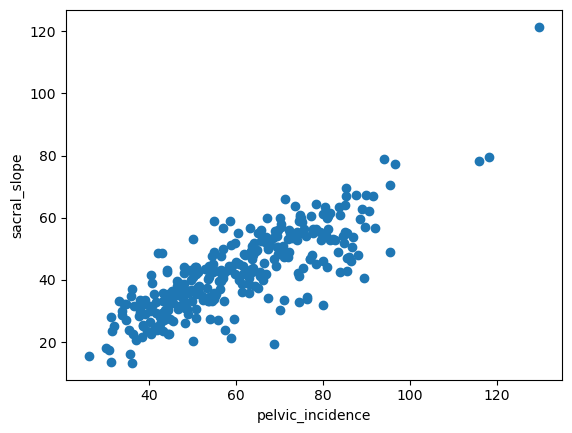

In [7]:
plt.scatter(x,y)
plt.xlabel("pelvic_incidence")
plt.ylabel("sacral_slope")
plt.show()

y=b0+b1*x

In [25]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

In [26]:
linear_reg.fit(x,y)

LinearRegression()

In [27]:
y_head=linear_reg.predict(x)

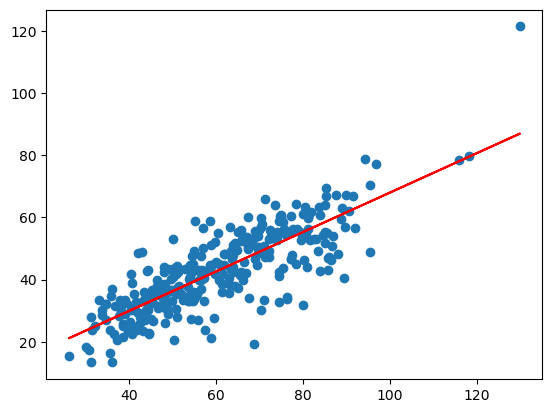

In [28]:
plt.plot(x,y_head,color="red")
plt.scatter(x,y)
plt.show()

In [37]:
x=data[["pelvic_incidence","pelvic_tilt numeric","lumbar_lordosis_angle","pelvic_radius","degree_spondylolisthesis"]]
y=data[["sacral_slope"]]

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

In [39]:
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [40]:
print("intercep",mlr.intercept_)
print("coefficients:")
list(zip(x,mlr.coef_))

intercep [5.55381519e-10]
coefficients:


[('pelvic_incidence',
  array([ 1.00000000e+00, -1.00000000e+00, -3.63179820e-11, -4.43231372e-12,
          6.94657329e-12]))]

In [47]:
y_pred=mlr.predict(x_test)

In [49]:
from sklearn import metrics 
meansqrer=metrics.mean_squared_error(y_test,y_pred)
print("r sqr{:.2f}".format(mlr.score(x,y)*100))
print("msqrerr:",meansqrer)

r sqr100.00
msqrerr: 2.2261059464531205e-17


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [51]:
x=np.array(data.loc[:,"pelvic_incidence"]).reshape(-1,1)
y=np.array(data.loc[:,"sacral_slope"]).reshape(-1,1)

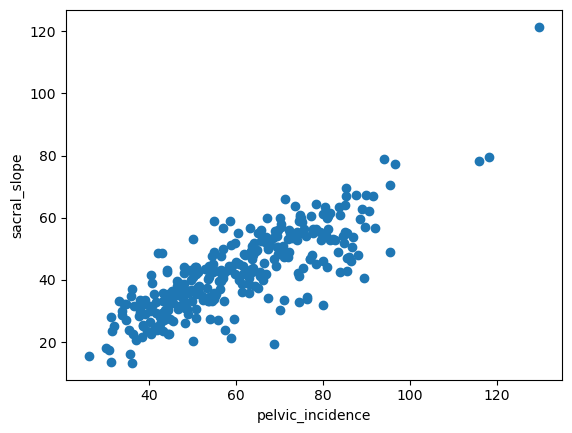

In [52]:
plt.scatter(x,y)
plt.xlabel("pelvic_incidence")
plt.ylabel("sacral_slope")
plt.show()

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [55]:
y_pred=lr.predict(x_test)
print(r2_score(y_test,y_pred))

0.5216659173945528


In [60]:
poly = PolynomialFeatures(degree=12,include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
lr=LinearRegression()
lr.fit(x_train_trans,y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test,y_pred))

0.49908778220474515


In [61]:
X_new = np.linspace(0,132,200).reshape(200,1)

In [62]:
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

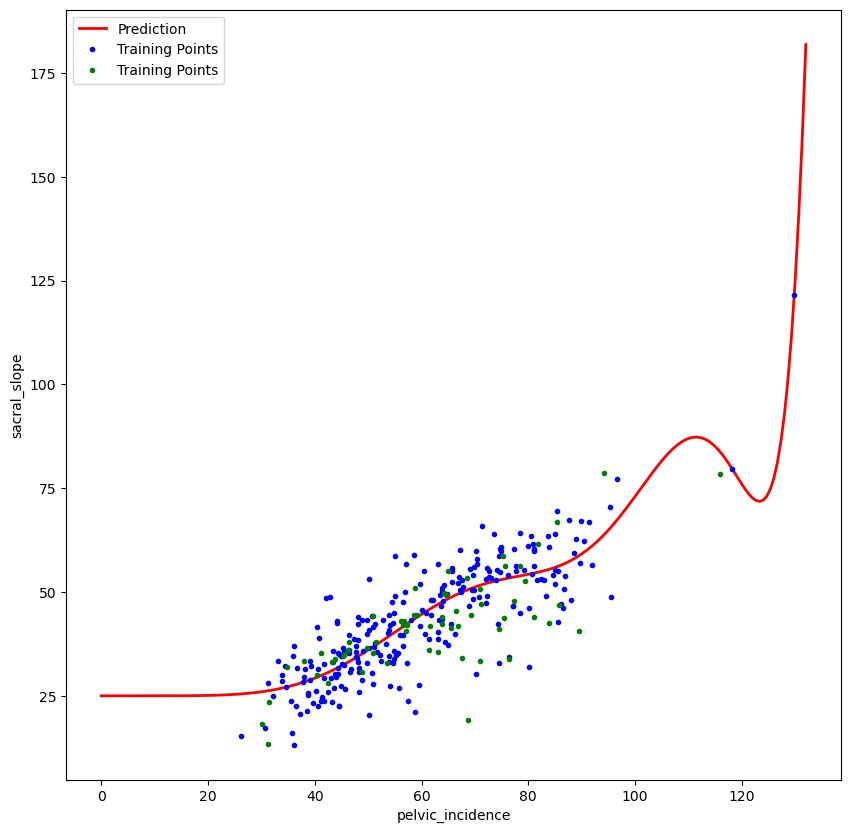

In [63]:
plt.figure(figsize=[10,10])
plt.plot(X_new,y_new,"r-",linewidth=2,label="Prediction")
plt.plot(x_train,y_train,"b.",label="Training Points")
plt.plot(x_test,y_test,"g.",label="Training Points")
plt.xlabel("pelvic_incidence")
plt.ylabel("sacral_slope")
plt.legend()
plt.show()